In [1]:
from IPython.display import display, HTML, Image

# Running Drude oscillator simulations of hexapeptides

A large portion of this notebook has been created by following the procedure outlined by Kognole et al., 2022. 
("CHARMM-GUI Drude prepper for molecular dynamics simulation using the classical Drude polarizable force field", J. Comput. Chem. 2022, 43, 359-375. DOI: 10.1002/jcc.26795)

This notebook aims to give the instructions required to create, run, and analyze a molecular dynamics simulation of a peptide using the Drude oscillator model. It requires Avogadro, an account on Charmm-GUI to create the input files, and OpenMM on a system with access to a NVIDIA GPU running CUDA (otherwise you will need to do some python editing beyond the scope of this workbook).

The alanine hexapeptide and serine hexapeptide .pdb files were created using the Peptide Builder capabilities of Avogadro. These files were then uploaded to the Charmm-GUI PDB Reader to create .psf and Charmm formatted .pdb files for each hexapeptide. These two files were used to perform two separate additive forcefield (FF) simulation for a total of 5ns in an implicit solvent ($\epsilon$=78.5) using the OpenMM framework following the guide described in Project_1. The run files can be viewed in the corresponding folders (ala_6_FF and ser_6_FF). The FF production run was done as a reference analysis for the further Drude models. Key results from the FF analysis are shown below, while full analysis of these simulations can be found in the corresponding notebooks (analysis/ala_6_analysis_FF and analysis/ser_6_analysis_FF).

Alanine hexapeptide


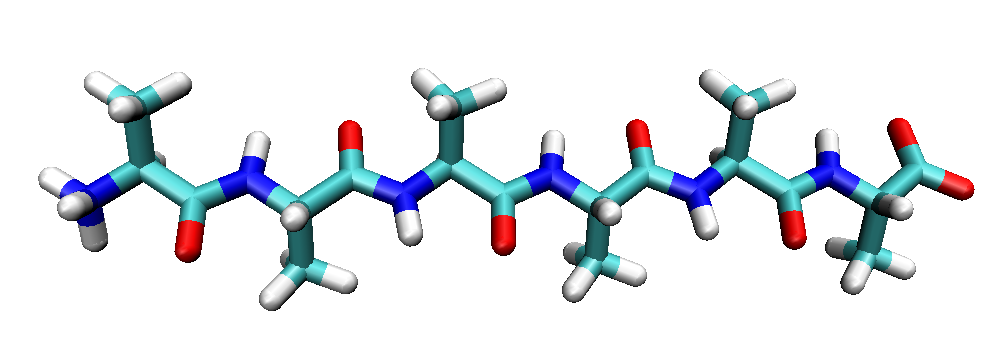

Serine hexapeptide


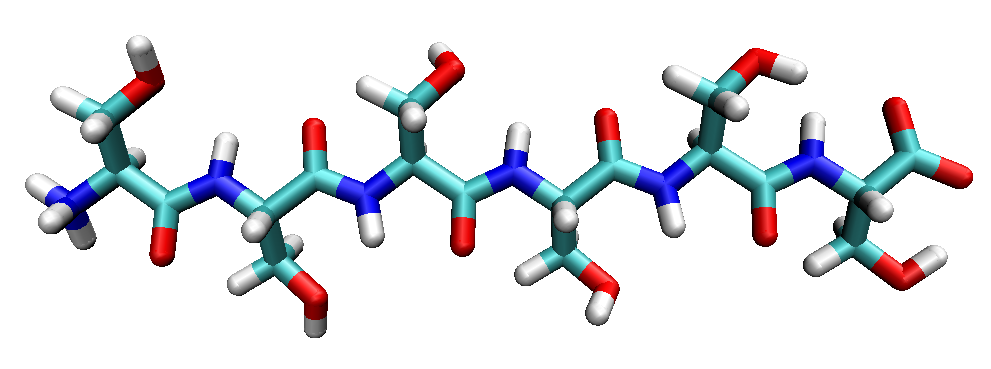

In [2]:
ala=Image('ala_FF.png',width=400,height=400)
ser=Image('ser_FF.png',width=400,height=400)
print('Alanine hexapeptide')
display(ala)
print('Serine hexapeptide')
display(ser)

The .pdb and .psf files were then used as the input files for Drude Prepper (https://charmm-gui.org/?doc=input/drude) which created the run files required to perform the simulation in implicit solvent using OpenMM achitecture. The output files for this run can be viewed in the corrensponding folders (ala_6_implicit/openmm and ser_6_implicit/openmm). Modifications were made to the following files:

> openmm_run.py - impliment implicit solvent instead of vacuum <br> Ln 60 solventDielectric=78.5)

> omm_readparams.py - Angstrom ($\mathring{A}$) to nm conversion bug <br> Ln 100 boxlx = 10(max_crds[0]-min_crds[0]) <br>
Ln 101 boxly = 10(max_crds[1]-min_crds[1]) <br>
Ln 102 boxlz = 10(max_crds[2]-min_crds[2]) 

> step5_production.inp - single run of 10ns <br> Ln 1 nstep = 10000000

These files allowed for a production run of 10ns for each hexapeptide at ~230ns/day using a single GPU on OpenMM. Key results from the FF analysis are shown below, while full analysis of these simulations can be found in the corresponding notebooks (analysis/ala_6_analysis_drude-implicit and analysis/ser_6_analysis_drude-implicit).

Alanine hexapeptide with drude particles (shown as cyan and pink)


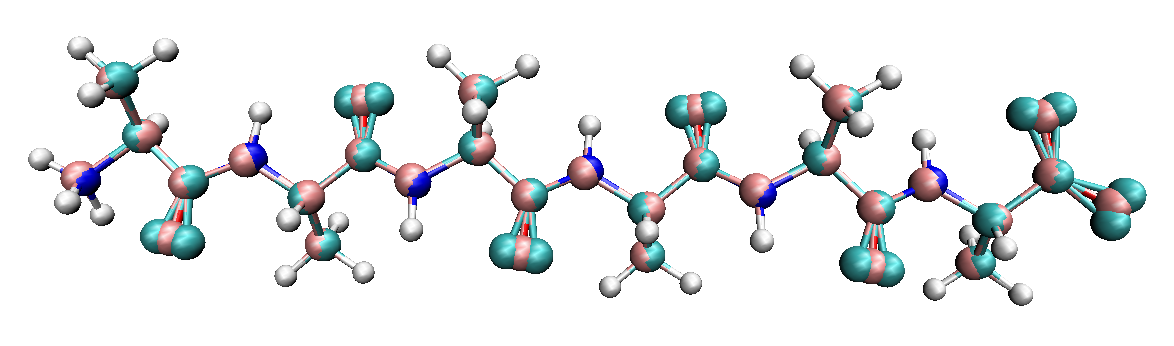

Serine hexapeptide with drude particles (shown as cyan and pink)


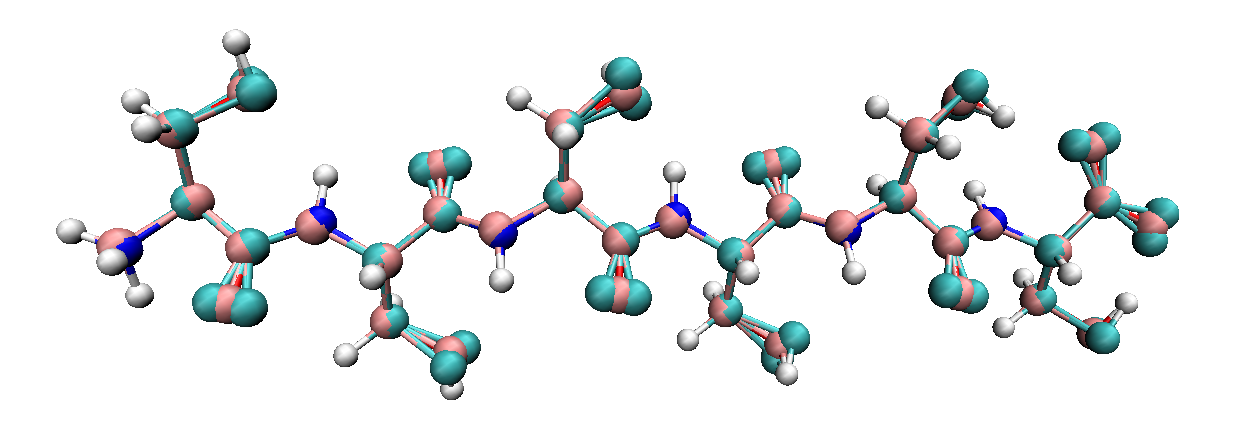

In [9]:
ala_drude=Image('ala_drude.png',width=400,height=400)
ser_drude=Image('ser_drude.png',width=400,height=400)
print('Alanine hexapeptide with drude particles (shown as cyan and pink)')
display(ala_drude)
print('Serine hexapeptide with drude particles (shown as cyan and pink)')
display(ser_drude)

To produce an explicit solvent production run, the initial FF .pdb of each hexapeptide were uploaded to the Charmm-GUI Solution Builder extention (https://charmm-gui.org/?doc=input/solution). This solvated the peptide in a cubic periodic box of 43 $\mathring{A}$ and created the Charmm formatted .pdb and .psf files. These outputs were then uploaded to Drude Prepper to create the run files for polarizable explicit solvent simulations. The output files for this run can be viewed in the corrensponding folders (ala_6_explicit/openmm and ser_6_explicit/openmm). As per the implimentation of the implicit sovlent, the step5_production.inp file was edited to allow for 10ns simulation times, however, the omm_readparams.py did not require any editing as the $\mathring{A}$ to nm conversion did not bug out. Interesting.<br> The simulations ran at ~120ns/day using a single GPU on OpenMM, with key results shown below. Full analysis of these simulations can be found in the corresponding notebooks (analysis/ala_6_analysis_drude-explicit and analysis/ser_6_analysis_drude-explicit).

Accidental run files of Drude models in vacuum were run and analyzed, however, they are not comparable to simulations in implicit or explicit water and have therefore not been included here. Their analysis and output files are available in the folder analysis/

## Key Results
### Alanine hexapeptide

The radius of gyration of the ALA-drude-implicit solvent remains constant and swollen in regard to the other models, around 0.66-0.68 (rodlike), whereas the ALA-drude-explicit solvent shows much more variation and the formation of a more folded structure towards the end of the run. The FF model exhibits a propensity for forming a folded structure. These behaviours may be due to the short runtime of the simulations, but they also indicate disagreement between all three methods. The autocorrelation time of each model is also shown, indicating that the drude models relax at a much faster rate than that of the FF model.

In [8]:
#Display code taken from https://stackoverflow.com/questions/47637739/how-to-display-two-local-images-side-by-side-in-jupyter

display(HTML("<table><tr><td><img src='alanine_imp1.png'></td><td><img src='alanine_imp4.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='alanine_exp1.png'></td><td><img src='alanine_exp4.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='alanine_FF1.png'></td><td><img src='alanine_FF4.png'></td></tr></table>"))

,


,


,


The Ramachandran plots of alanine below show convincingly that the ALA-drude-implicit model has not encapsulated the structures expected, staying very rigid. The ALA-drude-explicit plots show some added exploration of more states, however, they still predomiantly miss-characterize what is to be expected. The FF model exhibits most of the structures expected from alanine, but Residue 4 only partially captures the secondary C7ax basin at $\phi$=1. It is clear that the FF model is more appropriate in this instance, however, the short simulation times used limit the strength of this investigation.

In [5]:
display(HTML("<table><tr><td><img src='alanine_imp2.png'></td><td><img src='alanine_imp3.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='alanine_exp2.png'></td><td><img src='alanine_exp3.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='alanine_FF2.png'></td><td><img src='alanine_FF3.png'></td></tr></table>"))

,


,


,


### Serine hexapeptide

The radius of gyration of SER-drude-implicit solvent shows it has collapsed, having collapsed during the equilibrium run, and does not excape this configuration over the run. The SER-drude-explicit solvent shows more variation, a small expansion around the 4ns mark, but does not seem to exhibit much more than that of the implicit model. The FF model exhibits a more dynamic behaviour, with both extended and folded configurations. These behaviours may be due to the short runtime of the simulations but they also indicate disagreement between all three methods. The autocorrelation time of each model is also shown, indicating longer correlation times than that of the alanine system.

In [6]:
display(HTML("<table><tr><td><img src='serine_imp1.png'></td><td><img src='serine_imp4.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='serine_exp1.png'></td><td><img src='serine_exp4.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='serine_FF1.png'></td><td><img src='serine_FF4.png'></td></tr></table>"))

,


,


,


The Ramachandran plots of serine below show convincingly that both drude models show a strange array of structures. As with the alanine, SER-drude-implicit shows minimal exploration of conformations, which would be due to the collapsed structure it maintains throughout the simulation. The SER-drude-explicit plots show some added exploration of more states, however, it still remains rather rigid in those orientations. The FF model exhibits the most dynamic behaviour of all, as is expected after observing the radius of gyration. It is clear that the FF model is more appropriate in this instance, however, the short simulation times used again limit the strength of this investigation

In [7]:
display(HTML("<table><tr><td><img src='serine_imp2.png'></td><td><img src='serine_imp3.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='serine_exp2.png'></td><td><img src='serine_exp3.png'></td></tr></table>"))
display(HTML("<table><tr><td><img src='serine_FF2.png'></td><td><img src='serine_FF3.png'></td></tr></table>"))

,


,


,
